# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np



## Get the list of stocks in the S&P 500

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [4]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [5]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [6]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [7]:
# CODE HERE
# Use as many coding cells as you need

# Load closing prices
# Make sure you end this coding section by displaying your results: display(df_close)

In [8]:
# Download closing prices for the S&P 500 tickers
df_close_raw = yf.download(ticker_list, start=start_date, end=end_date)['Close']

/tmp/ipython-input-8-2852766504.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_close_raw = yf.download(ticker_list, start=start_date, end=end_date)['Close']
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


In [9]:
# Drop tickers (columns) with all missing values
df_close = df_close_raw.dropna(axis=1, how='all')

In [10]:
# Display the final DataFrame with closing prices
display(df_close)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376297,168.283661,154.714767,156.160004,103.735458,91.096085,293.442108,469.390015,189.859924,55.668907,...,29.172794,91.453217,51.484394,111.217079,129.094391,66.839996,132.078339,118.202545,309.049988,156.223297
2024-05-02,136.217361,171.991287,153.844177,158.330002,103.374336,90.497009,295.092743,476.570007,192.405899,56.603558,...,29.955240,93.958229,51.493965,111.418373,134.052734,70.300003,131.824615,117.115036,312.709991,164.827896
2024-05-03,138.129074,182.279144,156.695099,159.710007,103.354828,89.774330,298.403870,486.179993,195.480637,56.431889,...,30.032520,95.378410,51.934322,111.188332,135.255371,69.470001,131.112122,120.278709,309.589996,164.670181
2024-05-06,139.278091,180.619171,155.681015,162.000000,103.101074,92.370285,300.712830,493.589996,199.093964,57.404686,...,30.022860,96.522438,52.039631,111.907227,137.216995,73.529999,132.907913,119.191200,315.790009,163.566254
2024-05-07,139.931824,181.305023,155.508820,159.809998,103.618340,93.387741,305.232452,492.269989,199.338745,58.739899,...,29.800682,95.891251,52.671455,111.351273,138.035172,71.599998,132.644440,120.051323,317.869995,166.030350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,25.294355,81.371361,69.709930,107.638626,115.241966,57.500000,146.859604,101.237473,244.080002,151.792435
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,24.609919,81.900002,68.430580,107.579178,115.730400,58.090000,146.580978,101.247452,246.240005,152.958542
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,25.363791,81.989769,69.005791,107.638626,115.550972,58.320000,147.028778,101.496803,243.490005,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [11]:
# CODE HERE
# Use as many coding cells as you need

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)

In [12]:
# Compute 50-day moving average
df_ma50 = df_close.rolling(window=50).mean()

In [13]:
# Compute 200-day moving average
df_ma200 = df_close.rolling(window=200).mean()

In [14]:
# Display the resulting DataFrames
display(df_ma50)
display(df_ma200)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,118.589775,219.229514,194.882048,128.497001,129.695852,91.7206,322.755805,401.392800,204.386194,46.354729,...,28.290148,82.616266,68.725403,109.007224,120.092335,60.865000,151.386326,105.303733,277.851799,158.931156
2025-04-25,117.960954,218.678437,194.779480,128.136801,129.675178,91.7690,320.885378,399.492000,204.194042,46.424616,...,28.199398,82.695181,68.768236,109.031401,119.825021,60.367001,151.415763,105.358225,275.718199,158.535974
2025-04-28,117.376370,218.051459,194.792594,127.782001,129.642279,91.7896,318.998219,397.680000,203.901113,46.480952,...,28.121558,82.734114,68.802902,109.041310,119.530667,59.847600,151.409784,105.399390,274.119598,158.320587


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,133.080365,227.101211,183.261853,130.701575,116.973859,96.197872,340.475853,478.509449,214.892000,52.358255,...,29.730782,85.165791,64.041626,111.437774,125.549300,72.28710,136.723923,106.728763,346.199799,172.881444
2025-04-25,132.988336,227.008163,183.380334,130.551875,117.119244,96.185332,340.478540,477.517949,214.720084,52.293548,...,29.719768,85.156247,64.130069,111.439661,125.467794,72.25500,136.835707,106.711042,345.854800,172.787551
2025-04-28,132.891063,226.898010,183.529515,130.409175,117.261134,96.177719,340.493398,476.538299,214.512771,52.222563,...,29.712475,85.151355,64.220807,111.437109,125.371802,72.22490,136.937422,106.688920,345.453200,172.697852


### Detecting Golden and Death Crosses in the last 14 days

In [15]:
# CODE HERE
# Use as many coding cells as you need

# define a function that detects golden and death crosses in the last 14 days for all stocks

In [16]:
def detect_crosses(ma_short, ma_long, days_window=14):
    """
    Detects golden and death crosses in the last `days_window` days
    across all tickers in the moving average DataFrames.

    Returns:
        df_golden_cross_14d, df_death_cross_14d
    """
    golden_crosses = []
    death_crosses = []

    # Loop through each ticker
    for ticker in ma_short.columns:
        short_ma = ma_short[ticker]
        long_ma = ma_long[ticker]

        # Compute the difference and its sign
        diff = short_ma - long_ma
        signal = np.sign(diff)
        cross_signal = signal.diff()

        recent_crosses = cross_signal.tail(days_window)

        if (recent_crosses == 2).any():  # -1 to +1 => golden cross
            golden_crosses.append(ticker)
        if (recent_crosses == -2).any():  # +1 to -1 => death cross
            death_crosses.append(ticker)

    df_golden_cross_14d = pd.DataFrame(golden_crosses, columns=['Ticker'])
    df_death_cross_14d = pd.DataFrame(death_crosses, columns=['Ticker'])

    return df_golden_cross_14d, df_death_cross_14d

# Detect golden and death crosses
df_golden_cross_14d, df_death_cross_14d = detect_crosses(df_ma50, df_ma200)


In [17]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)

In [18]:
# Display intermediary results
display(df_golden_cross_14d)
display(df_death_cross_14d)

,Ticker
0,AMT
1,CI
2,EW
3,INVH
4,KDP
5,MDLZ
6,MOH
7,NEM
8,SBAC
9,SJM


,Ticker
0,ACN
1,ADSK
2,AME
3,AMP
4,AMZN
...,...
57,UNP
58,VST
59,WAB
60,WAT


In [19]:
# Sort golden cross tickers alphabetically and display top results
golden_sorted = df_golden_cross_14d.sort_values(by='Ticker').reset_index(drop=True)

# Sort death cross tickers alphabetically and display top 10
death_sorted = df_death_cross_14d.sort_values(by='Ticker').reset_index(drop=True)

# Print the first companies alphabetically with golden crosses
print("Golden Crosses - Alphabetical Order (Top Companies):")
print(golden_sorted.head(10)['Ticker'].tolist())

# Print the first 10 companies alphabetically with death crosses
print("Death Crosses - Alphabetical Order (Top 10):")
print(death_sorted.head(10)['Ticker'].tolist())


Golden Crosses - Alphabetical Order (Top Companies):
['AMT', 'CI', 'EW', 'INVH', 'KDP', 'MDLZ', 'MOH', 'NEM', 'SBAC', 'SJM']
Death Crosses - Alphabetical Order (Top 10):
['ACN', 'ADSK', 'AME', 'AMP', 'AMZN', 'APD', 'APO', 'AXP', 'BAC', 'BLK']


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

AMT, CI, EW, INVH, KDP, MDLZ, MOH, NEM, SBAC, SJM

#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

ACN, ADSK, AME, AMP, AMZN, APD, APO, AXP, BAC, BLK

### Visualization of the results
(in alphabetical order)

In [20]:
#Print the first 10 companies alphabetically with golden and death crosses
print("Golden Crosses - Alphabetical Order (Top Companies):")
display(golden_sorted)
print("Death Crosses - Alphabetical Order (Top 10):")
display(death_sorted.head(10))

Golden Crosses - Alphabetical Order (Top Companies):


,Ticker
0,AMT
1,CI
2,EW
3,INVH
4,KDP
5,MDLZ
6,MOH
7,NEM
8,SBAC
9,SJM


Death Crosses - Alphabetical Order (Top 10):


,Ticker
0,ACN
1,ADSK
2,AME
3,AMP
4,AMZN
5,APD
6,APO
7,AXP
8,BAC
9,BLK


#### Compute the volatility of every stock and print it in the title of each plot

In [21]:
# CODE HERE
# Use as many coding cells as you need

# Compute the volatility of every stock in the S&P 500


In [22]:
# Compute volatility as the standard deviation of daily returns
daily_returns = df_close.pct_change()
volatility = daily_returns.std()

# Display volatility values
display(volatility.sort_values())


,0
Ticker,
EVRG,0.009885
KO,0.010369
ATO,0.010589
CMS,0.010720
WEC,0.010881
...,...
TSLA,0.045489
PLTR,0.045638
VST,0.047544


In [23]:
def plot_stock_with_volatility(ticker):
    plt.figure(figsize=(7, 3))

    plt.plot(df_close[ticker], label='Close Price', alpha=0.6)
    plt.plot(df_ma50[ticker], label='MA50', linestyle='--')
    plt.plot(df_ma200[ticker], label='MA200', linestyle='--')

    # Highlight the last 14 days
    plt.axvspan(df_close.index[-14], df_close.index[-1], color='yellow', alpha=0.2, label='Last 14 Days')

    # Title with volatility
    vol = volatility[ticker]
    plt.title(f"{ticker} | Volatility: {vol:.4f}")

    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

In [24]:
# CODE HERE
# Visualize the results here

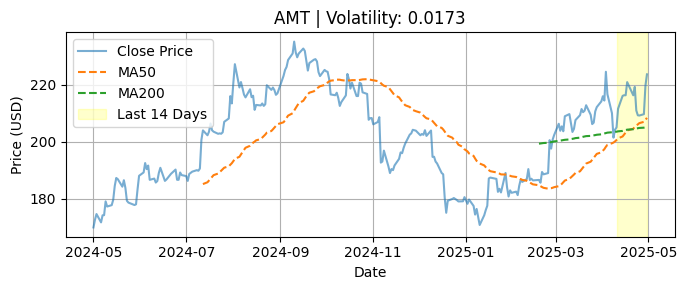

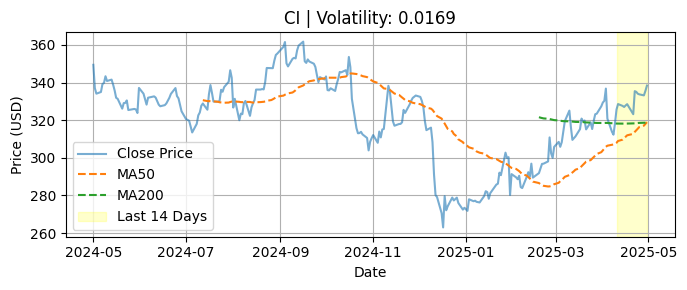

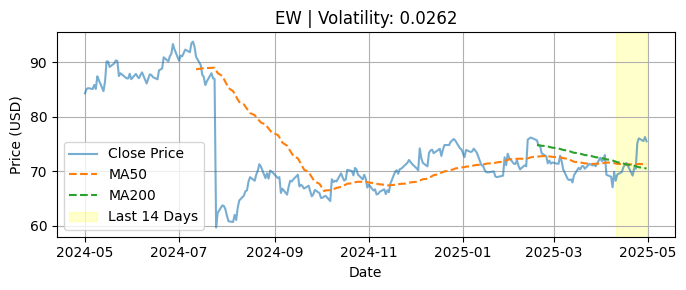

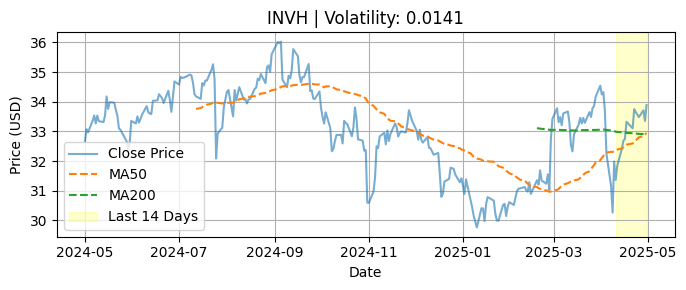

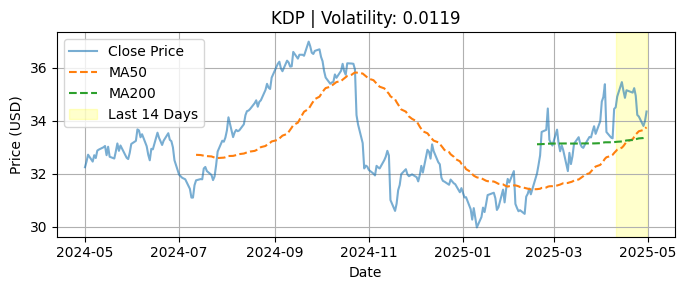

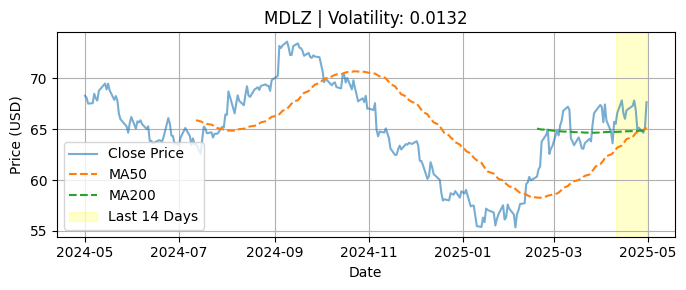

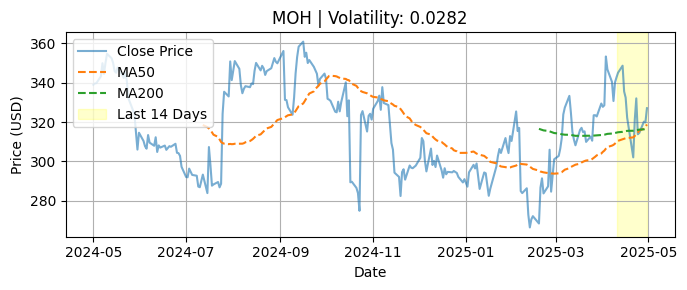

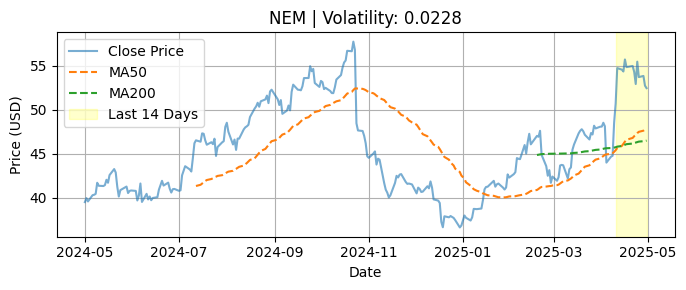

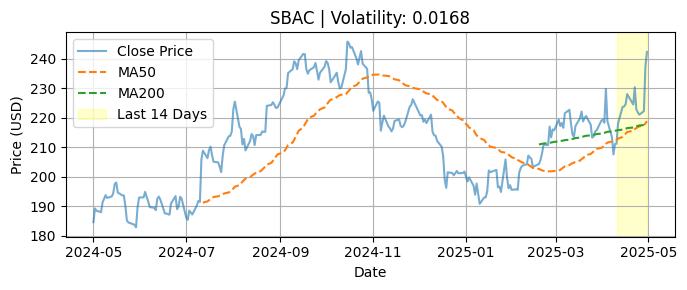

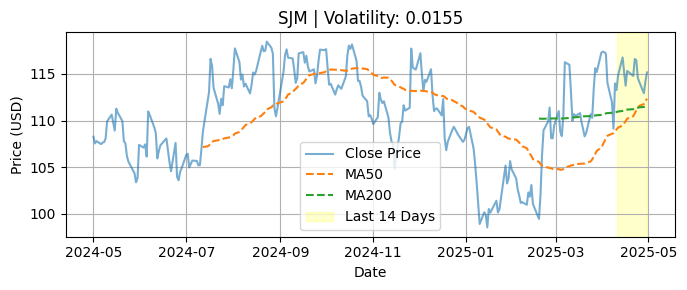

In [25]:
# Get the top 10 tickers with Golden Crosses in alphabetical order
golden_top10 = df_golden_cross_14d.sort_values(by='Ticker').head(10)['Ticker'].tolist()

# Plot each stock with its volatility in the title
for ticker in golden_top10:
    if ticker in df_close.columns and ticker in df_ma50.columns and ticker in df_ma200.columns:
        # Optional: Skip if not enough data for MA200 (i.e. all NaNs)
        if df_ma200[ticker].notna().sum() >= 1:
            plot_stock_with_volatility(ticker)


### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

In [26]:
# CODE HERE
# Visualize the results here

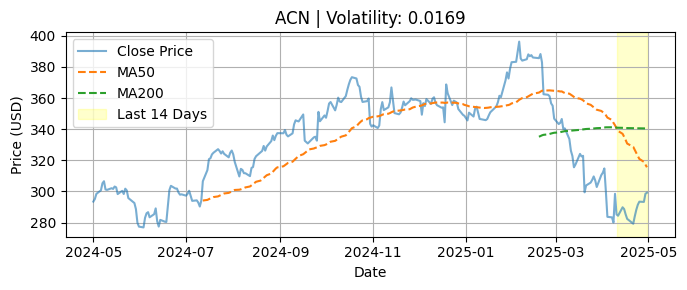

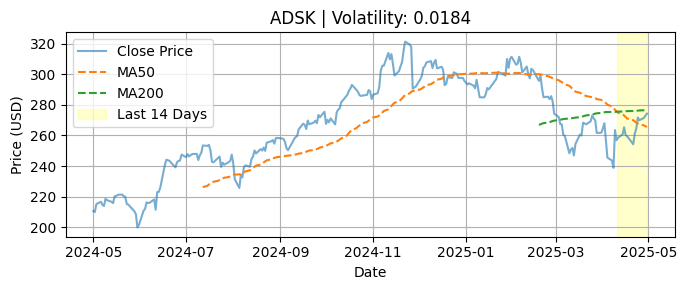

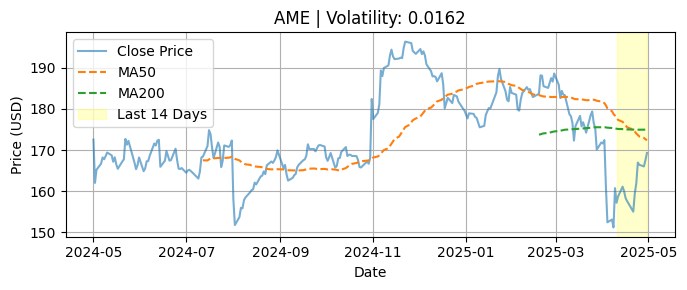

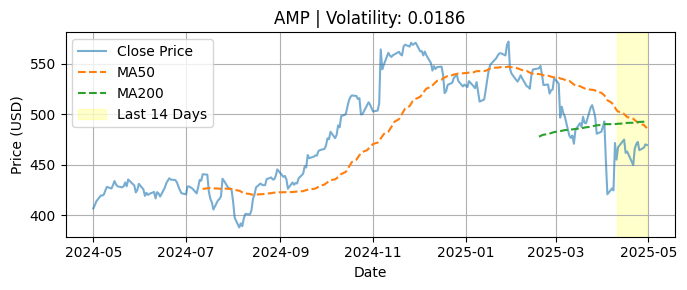

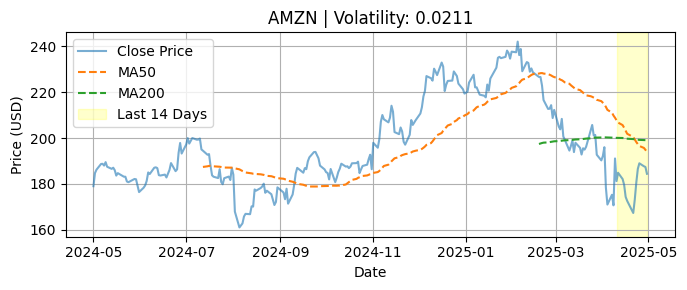

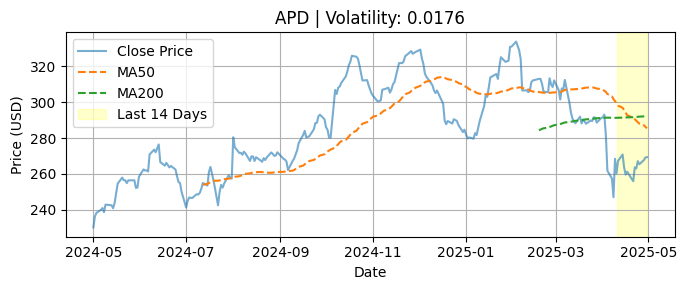

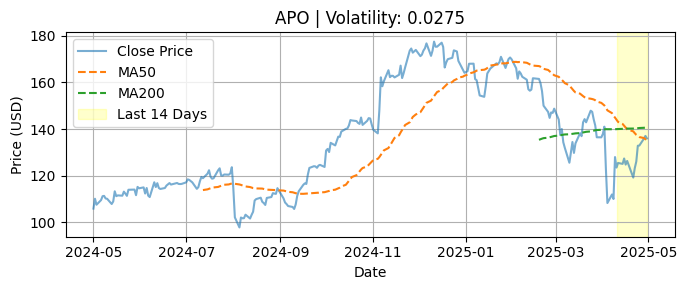

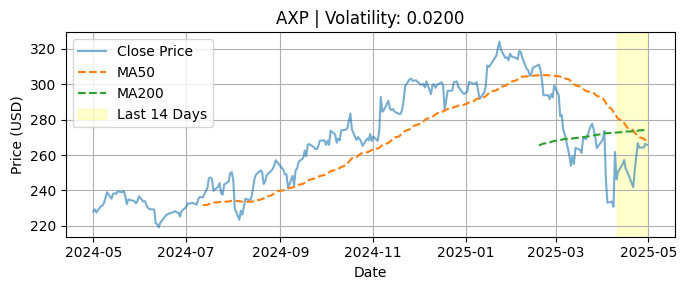

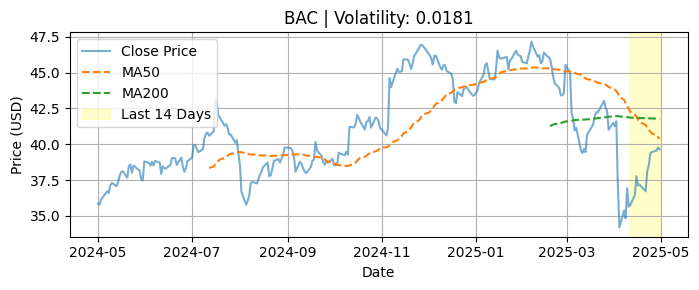

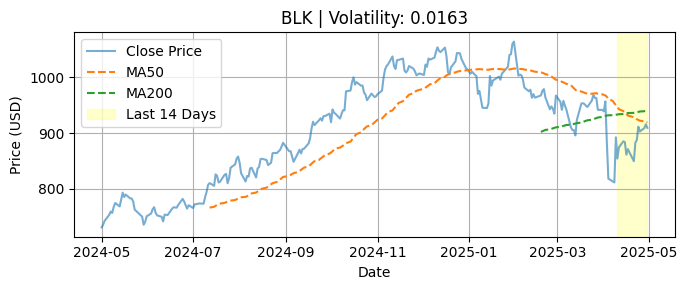

In [27]:
# Get the top 10 tickers with Death Crosses in alphabetical order
death_top10 = df_death_cross_14d.sort_values(by='Ticker').head(10)['Ticker'].tolist()

# Plot each stock with its volatility in the title
for ticker in death_top10:
    if ticker in df_close.columns and ticker in df_ma50.columns and ticker in df_ma200.columns:
        if df_ma200[ticker].notna().sum() >= 1:  # Ensure there's enough data
            plot_stock_with_volatility(ticker)


## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

A Golden Cross is when the 50-day moving average crosses above the 200-day moving average. It usually means the price might start going up long term, so investors take it as a signal to buy.



#### What is a Death Cross and how might market participants react to it?

A Death Cross is when the 50-day average crosses below the 200-day average. It’s seen as a sign that the stock could go down, so some investors prefer to sell or avoid buying when this happens.



#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

They help smooth out price movements and show the overall direction of the trend. MA50 shows recent momentum, while MA200 shows the long-term trend. Comparing them can highlight when momentum is changing.


#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

Using the last 14 days helps focus only on recent signals. This is useful to spot opportunities that are still "fresh" and possibly actionable. But it also means we could miss longer-term patterns or signals that just fell outside the window.


#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

Volatility shows how much the price moves day to day. Around a cross, high volatility could mean uncertainty or false signals, while low volatility might suggest more stability in the trend. It helps decide how confident we should be in the signal.

### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

I would simulate trades based on past Golden Cross signals and calculate returns over a fixed period, like 30 or 60 days. Then I would compare that performance to random entries or a passive benchmark.


#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

You might buy a stock that looks good technically but is weak financially. A company with poor earnings, high debt, or bad news could drop even if there's a Golden Cross. Ignoring fundamentals adds risk.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

I would add filters like volume confirmation, price above both MAs, or include trend strength indicators. Also, combining it with basic fundamental checks (like EPS growth or debt ratio) might reduce false positives.


### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

Yes, definitely. If a stock just had a Golden Cross but the news sentiment is negative, it might not be the right time to enter. On the other hand, positive sentiment could support the signal and increase confidence.

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

Not really. It's a good starting point, but I would need more confirmation before placing real trades. On its own, it’s too simple and can lead to false signals.

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

Not always. Some did, but others moved sideways or dropped. The cross shows a change in momentum, but it's not a guarantee. Volatility adds more context but doesn’t confirm direction.


#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:



*   Golden and Death Crosses can help detect possible changes in long-term trends and are useful to spot momentum shifts.
*  Combining these signals with volatility gives extra context and can help decide if a trade looks more stable or risky.


Caveats in 2 or 3 bullet points:


*   Not all crosses lead to strong movements; some are false signals, especially in volatile or sideways markets.
*   The strategy doesn't consider company fundamentals, which can affect the price even if the chart looks good.
*   This approach works better when combined with other tools, like news sentiment or basic financial indicators.